## Image Processing with Python

This notebook demonstrates the workflow for color object detection in Python. This notebook uses many functions from PlantCV, a python package for plant imaging and analysis. For more information see here; https://plantcv.readthedocs.io/en/latest/


In [4]:
#import packages and change settings
%matplotlib inline
import os
import sys
from PIL import Image 
sys.path.append('/home/user/plantcv')
import numpy as np
import cv2
from scipy import ndimage

from matplotlib import pyplot as plt
from plantcv import plantcv as pcv

pcv.params.debug = 'plot'  

### 1. Select an image from the data folder

The data folder contains example images of tomato plants along with any photos you have taken yourself. Remember the filename of the image you want to work with.

In [5]:
import os
directory = "data/"
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        print(os.path.join(directory, filename))
        continue
    else:
        continue
        

# Set variables
pcv.params.debug = 'plot'                     # Plot debug images to the notebook


data/skittle.jpg
data/test.jpg
data/tomatoes1.jpg
data/tomatoes2.jpg
data/tomatoes3.jpg
data/tomatoes4.jpg
data/tomatoes5.jpg
data/tomatoes6.jpg
data/tomatoes7.jpg


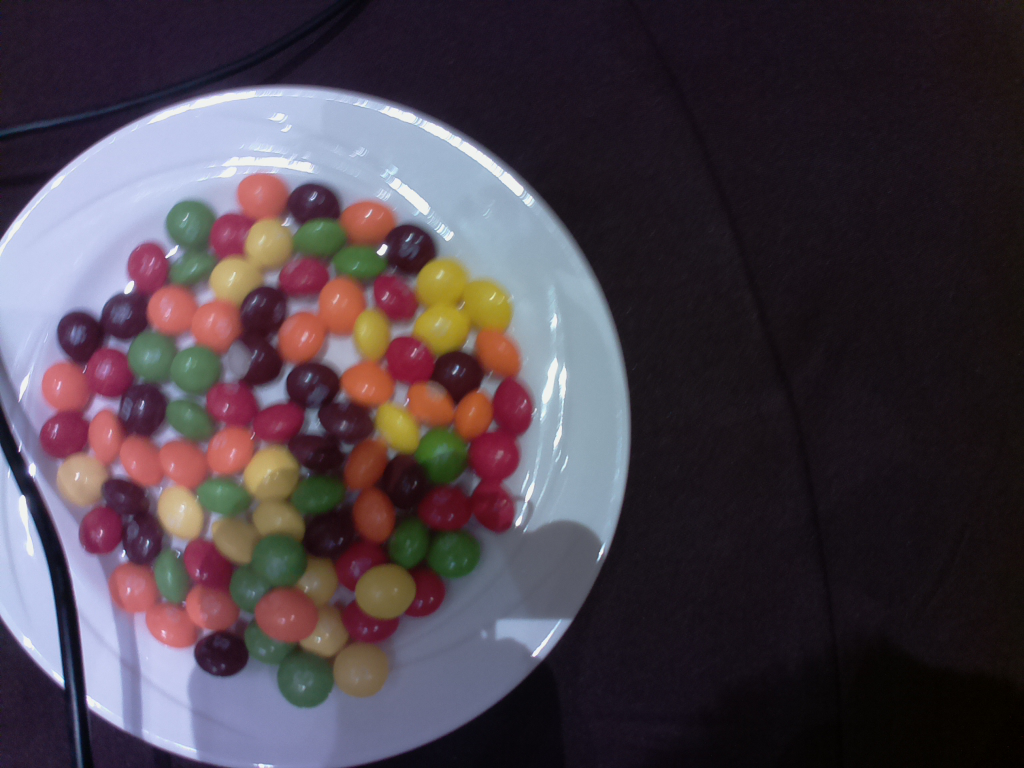

In [6]:
#Preview the image you have selected here.
img_file_uncropped = "data/test.jpg"
im = Image.open(img_file_uncropped) 
im

### 2. Crop and Rotate the image
We want to remove any distracting elements from the background before processing the image. Crop and/or rotate the image with the commands below. 

For the example images; try to only get the parts of the plant inside the borders of the blue background.
Otherwise, do your best to isolate the objects to within a single defined border.

In [9]:
im1 = im.rotate(0)
#crop(left, top, right, bottom)
width, height = im1.size 
#(1280x720)
# Setting the points for cropped image 
left = 200
top = 1* (height / 4)
right = 900
bottom = 4 * height / 4
  
# Cropped image of above dimension 
# (It will not change orginal image) 
im1 = im.crop((left, top, right, bottom))
#Save the image after cropping
im1 = im1.save("cropped_image.png") 
im1

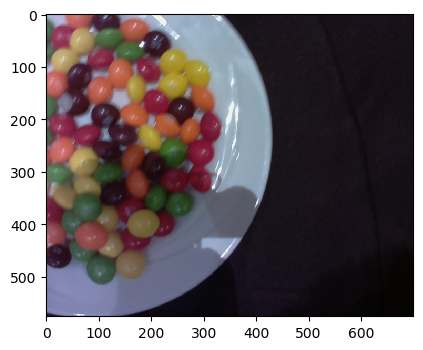

In [10]:
#Load the imag as a plantCV image object 
img, path, filename = pcv.readimage(filename ="cropped_image.png", mode = "rgb")

### 3. Remove the background

The first step is to remove the background from the object of interest. To do this, we extract a color channel from the image and threshold over that color channel

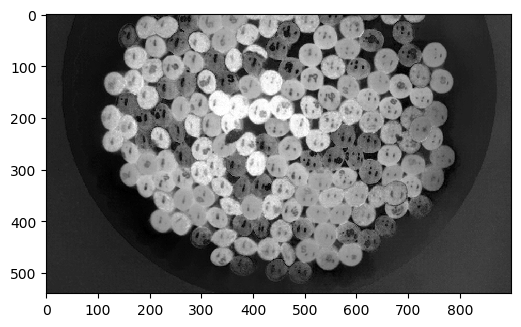

In [72]:
# Convert RGB to HSV and extract the saturation channel
    # Inputs:
    #   rgb_image - RGB image data 
    #   channel - Split by 'h' (hue), 's' (saturation), or 'v' (value) channel
s = pcv.rgb2gray_hsv(rgb_img=img, channel='s')

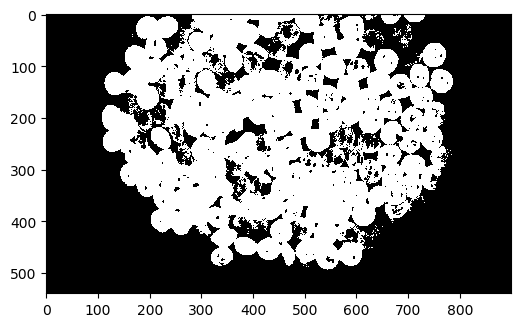

In [75]:
#We can then remove any parts of the image that are above or below that color threshold. 
#You can adjust the threshold value with the "threshold" argument.
#"object_type" can be "light" or "dark" to flip the direction of the threshold.
s_thresh = pcv.threshold.binary(gray_img=s, threshold=100, max_value=255, object_type='light')

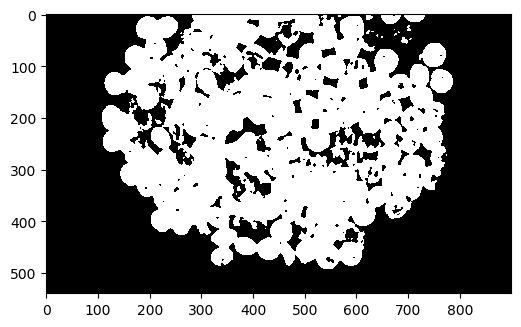

In [76]:
#We then apply a small blurring affect to minimizing background noise. 
#This will remove the white specs from the background, but too much blur effect
#will lower the sharpness/details in the image.
s_mblur = pcv.median_blur(gray_img=s_thresh, ksize=5)

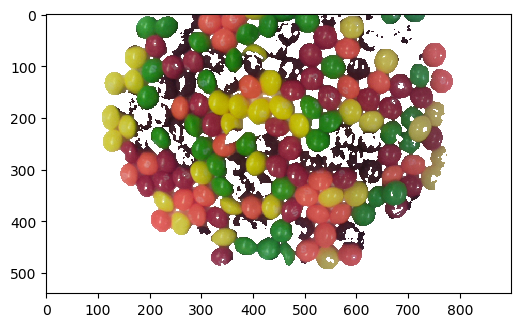

In [77]:
#We then create a mask" by isolating the white part of the image.
#The mask can be inversed by toggling "mask_color" to "black"
masked = pcv.apply_mask(rgb_img=img, mask=s_mblur, mask_color='white')

### 4. Color object detection

Now that we have removed the background, we can begini isolating colored objects of interest.

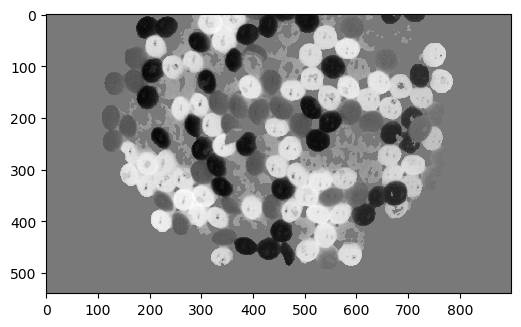

In [78]:
# Input:
    #   rgb_img - RGB image data 
    #   channel- Split by 'l' (lightness), 'a' (green-magenta), or 'b' (blue-yellow) channel
a = pcv.rgb2gray_lab(rgb_img=masked, channel='a')
#b = pcv.rgb2gray_lab(rgb_img=masked, channel='b')

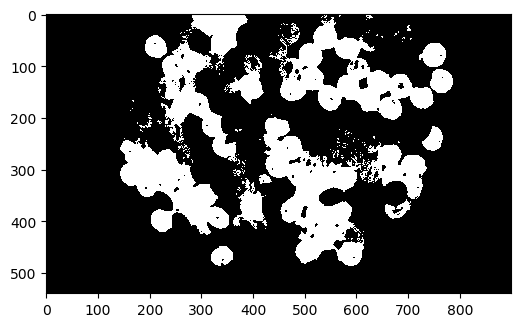

In [85]:
#After filting on a different color channel, we repeat the process from before where we threshold and mask the image
#to isolate the objects of interest
a_thresh = pcv.threshold.binary(gray_img=a, threshold=140, max_value=255, 
                                    object_type='light')

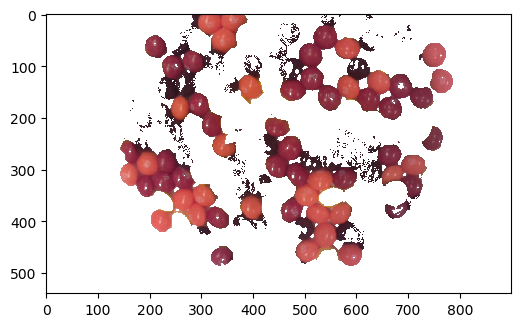

In [86]:
masked2 = pcv.apply_mask(rgb_img=img, mask=a_thresh, mask_color='white')

### 5. Counting blobs

The last step is to isolate and count the number of objects in our image.  This step is a little complicated, but it essentially tries to count the number of objects in the image by labeling the connected regions of the integer array that makes up the image. 

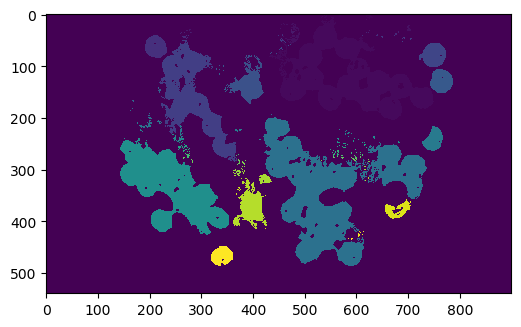

In [87]:
blobs = a_thresh < a_thresh.mean()
from skimage import measure
all_labels = measure.label(blobs)
blobs_labels = measure.label(blobs, background=1)
plt.imshow(blobs_labels)


In [88]:
#We then try to count the number of objects labeled.
count = ndimage.find_objects(blobs_labels)
len(count)

280

### Finished!

That's all it takes to do some basic color imaging with Python! Do you count the same number of objects by eye as the program did? If not, why do you think your answers were different? This notebook only covers some of the very basic of image detection. For more accurate results, other techniques such as edge detection or clustering are necessary. This notebook was intended to introduce you to the basic of image processing and encourage you to use these easily accessible tools to develop your own image processing workflows. 


